# Importação de modulos e arquivos

In [1]:
import pandas as pd

In [2]:
serv_prestado_df = pd.read_excel('BaseServiçosPrestados.xlsx')
cliente_df = pd.read_csv('CadastroClientes.csv', sep = ';', decimal = ',', encoding = 'utf-8')
funcionario_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',', encoding = 'utf-8')

In [3]:
#Apagar colunas
funcionario_df = funcionario_df.drop(['Estado Civil', 'Cargo'], axis =1)

# Valor total gasto

In [4]:
funcionario_df['Valor Total'] = funcionario_df['Salario Base'] + funcionario_df['Impostos'] + funcionario_df['Beneficios'] + funcionario_df['VT'] + funcionario_df['VR']
valor_total_func = funcionario_df['Valor Total'].sum()

print('O Valor total da folha salarial foi de R${:10,.1f}'.format(valor_total_func))

O Valor total da folha salarial foi de R$2,717,493.2


# Faturamento

In [5]:
faturamento_df = serv_prestado_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(cliente_df[['ID Cliente', 'Valor Contrato Mensal']], on ='ID Cliente')
faturamento_df['Valor Contrato Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']

print('Faturamento Total: R${:,}'.format(sum(faturamento_df['Valor Contrato Total'])))

Faturamento Total: R$5,519,160


# % de funcionarios que fecharam contratos


In [6]:
qtd_funcionarios_totais = len(funcionario_df['ID Funcionário'].unique())
qtd_funcionarios_servico = len(serv_prestado_df['ID Funcionário'].unique())

print('O percentual de funcionarios que fechou algum contrato foi de de {:.2%}'.format(qtd_funcionarios_servico / qtd_funcionarios_totais))

O percentual de funcionarios que fechou algum contrato foi de de 86.84%


# Contratos por área

<AxesSubplot:title={'center':'Contratos por Area'}>

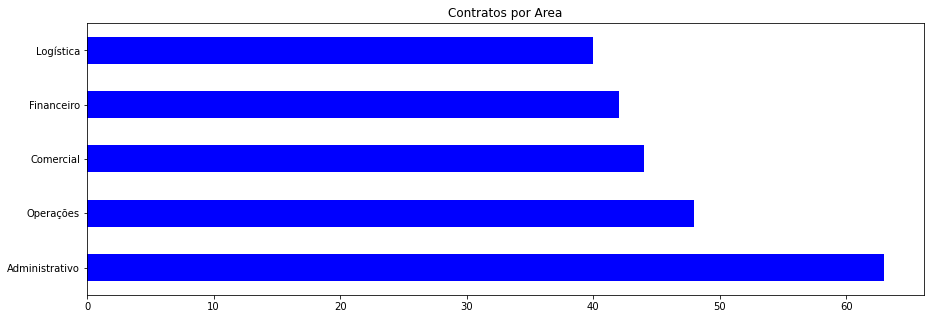

In [10]:
contratos_area_df = serv_prestado_df[['ID Funcionário']].merge(funcionario_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()

contratos_area_qtde.plot.barh(figsize = (15,5), color = 'blue', title = 'Contratos por Area')

# Total de funcionarios por área

<AxesSubplot:title={'center':'Funcionario por Área'}>

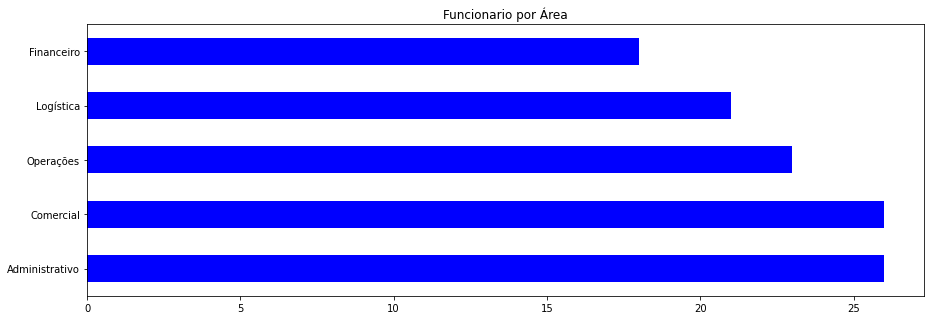

In [11]:
funcionario_area = funcionario_df['Area'].value_counts()

funcionario_area.plot.barh(figsize = (15,5), title = 'Funcionario por Área', color = 'blue')

# Ticket Médio


In [9]:
ticket_medio_contrato = cliente_df['Valor Contrato Mensal'].mean()
print('O valor do Ticket Médio Mensal foi de R${:1,.1f}'.format(ticket_medio_contrato))

O valor do Ticket Médio Mensal foi de R$2,502.6
